In [24]:
## Identify fraud from Enron Email

### Enron became a symbol for fraud 
# The spectacular collapse of a giant american company in electric field was not only an end to the company
# but brought also a massive change for the american and global economy. 
# In 2001 Enron announced results for 3rd quarter and at the same time to a big surprise of shareholders a banckruptacy.
# In this project I'd like to focus on the most influencial workers of Enron which are obviously involved in the fraud.
# The most famous is CEO Jeffrey Keith "Jeff" Skilling and a chairman  Kenneth Lay of Enron 
# during most of the time when the crime occured.
# We will see their salaries, bonuses and stocks which are quite interesting.
# 

# Going through given dataset with e-mails within Enron co-workers we will discover a POI - Person of Interest,
# basically a person suspected to participate in the fraud.
# 

In [96]:
# Firstly, let's load the necessary data and packages. 
# I am going to create a dataframe in pandas and then with the use of numpy arrays and matplotlib visualize it.
# To further analysis in classyfing will need Sklearn, GaussianNB,... i co jeszcze?

import sys
import pickle
sys.path.append("../tools/")
import random

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.grid_search import GridSearchCV
from time import time

import pandas as pd
get_ipython().magic(u'matplotlib inline')
from matplotlib import pyplot as plt

### Let's load my dictionary providede by Udacity
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [97]:
# Let's check the type of my dataset, as we see it's a dictionary
type(data_dict)

dict

In [51]:
numpy.isinf

np.isinf(np.inf)

np.isinf(np.nan)

np.isinf(np.NINF)

np.isinf([np.inf, -np.inf, 1.0, np.nan])
array([ True,  True, False, False], dtype=bool)

NameError: name 'numpy' is not defined

In [98]:
# By converting the dictionary to a dataframe with pandas it will be easier and faster to work with it:
enron_dataf = pd.DataFrame.from_records(list(data_dict.values()))

In [99]:
# Previosly the index were numbers, but it's easier to set them as names of employees series:
employees = pd.Series(list(data_dict.keys()))
enron_dataf.set_index(employees, inplace=True)
enron_dataf.head()


bonus deferral_payments deferred_income director_fees  \
METTS MARK         600000               NaN             NaN           NaN   
BAXTER JOHN C     1200000           1295738        -1386055           NaN   
ELLIOTT STEVEN     350000               NaN         -400729           NaN   
CORDES WILLIAM R      NaN               NaN             NaN           NaN   
HANNON KEVIN P    1500000               NaN        -3117011           NaN   

                             email_address exercised_stock_options expenses  \
METTS MARK            mark.metts@enron.com                     NaN    94299   
BAXTER JOHN C                          NaN                 6680544    11200   
ELLIOTT STEVEN    steven.elliott@enron.com                 4890344    78552   
CORDES WILLIAM R     bill.cordes@enron.com                  651850      NaN   
HANNON KEVIN P      kevin.hannon@enron.com                 5538001    34039   

                 from_messages from_poi_to_this_person  \
METTS MARK                  29                      38   
BAXTER JOHN C              NaN                     NaN   
ELLIOTT STEVEN             NaN                     NaN   
CORDES WILLIAM R            12                      10   
HANNON KEVIN P              32                      32   

                 from_this_person_to_poi        ...         \
METTS MARK                             1        ...          
BAXTER JOHN C                        NaN        ...          
ELLIOTT STEVEN                       NaN        ...          
CORDES WILLIAM R                       0        ...          
HANNON KEVIN P                        21        ...          

                 long_term_incentive    other    poi  restricted_stock  \
METTS MARK                       NaN     1740  False            585062   
BAXTER JOHN C                1586055  2660303  False           3942714   
ELLIOTT STEVEN                   NaN    12961  False           1788391   
CORDES WILLIAM R                 NaN      NaN  False            386335   
HANNON KEVIN P               1617011    11350   True            853064   

                 restricted_stock_deferred  salary shared_receipt_with_poi  \
METTS MARK                             NaN  365788                     702   
BAXTER JOHN C                          NaN  267102                     NaN   
ELLIOTT STEVEN                         NaN  170941                     NaN   
CORDES WILLIAM R                       NaN     NaN                      58   
HANNON KEVIN P                         NaN  243293                    1035   

                 to_messages total_payments total_stock_value  
METTS MARK               807        1061827            585062  
BAXTER JOHN C            NaN        5634343          10623258  
ELLIOTT STEVEN           NaN         211725           6678735  
CORDES WILLIAM R         764            NaN           1038185  
HANNON KEVIN P          1045         288682           6391065  

[5 rows x 21 columns]

In [100]:
# Coerce numeric values into floats or ints; also change NaN to zero:
enron_dataf = enron_dataf.apply(lambda x : pd.to_numeric(x, errors = 'coerce')).copy().fillna(0)
enron_dataf.head()

bonus  deferral_payments  deferred_income  \
METTS MARK         600000.0                0.0              0.0   
BAXTER JOHN C     1200000.0          1295738.0       -1386055.0   
ELLIOTT STEVEN     350000.0                0.0        -400729.0   
CORDES WILLIAM R        0.0                0.0              0.0   
HANNON KEVIN P    1500000.0                0.0       -3117011.0   

                  director_fees  email_address  exercised_stock_options  \
METTS MARK                  0.0            0.0                      0.0   
BAXTER JOHN C               0.0            0.0                6680544.0   
ELLIOTT STEVEN              0.0            0.0                4890344.0   
CORDES WILLIAM R            0.0            0.0                 651850.0   
HANNON KEVIN P              0.0            0.0                5538001.0   

                  expenses  from_messages  from_poi_to_this_person  \
METTS MARK         94299.0           29.0                     38.0   
BAXTER JOHN C      11200.0            0.0                      0.0   
ELLIOTT STEVEN     78552.0            0.0                      0.0   
CORDES WILLIAM R       0.0           12.0                     10.0   
HANNON KEVIN P     34039.0           32.0                     32.0   

                  from_this_person_to_poi        ...          \
METTS MARK                            1.0        ...           
BAXTER JOHN C                         0.0        ...           
ELLIOTT STEVEN                        0.0        ...           
CORDES WILLIAM R                      0.0        ...           
HANNON KEVIN P                       21.0        ...           

                  long_term_incentive      other    poi  restricted_stock  \
METTS MARK                        0.0     1740.0  False          585062.0   
BAXTER JOHN C               1586055.0  2660303.0  False         3942714.0   
ELLIOTT STEVEN                    0.0    12961.0  False         1788391.0   
CORDES WILLIAM R                  0.0        0.0  False          386335.0   
HANNON KEVIN P              1617011.0    11350.0   True          853064.0   

                  restricted_stock_deferred    salary  \
METTS MARK                              0.0  365788.0   
BAXTER JOHN C                           0.0  267102.0   
ELLIOTT STEVEN                          0.0  170941.0   
CORDES WILLIAM R                        0.0       0.0   
HANNON KEVIN P                          0.0  243293.0   

                  shared_receipt_with_poi  to_messages  total_payments  \
METTS MARK                          702.0        807.0       1061827.0   
BAXTER JOHN C                         0.0          0.0       5634343.0   
ELLIOTT STEVEN                        0.0          0.0        211725.0   
CORDES WILLIAM R                     58.0        764.0             0.0   
HANNON KEVIN P                     1035.0       1045.0        288682.0   

                  total_stock_value  
METTS MARK                 585062.0  
BAXTER JOHN C            10623258.0  
ELLIOTT STEVEN            6678735.0  
CORDES WILLIAM R          1038185.0  
HANNON KEVIN P            6391065.0  

[5 rows x 21 columns]

In [101]:
# from above table we can see that some of the data can be interrupting with our analysis
# so let's get rid off, for example the e-mail address column 

enron_dataf.drop('email_address', 1)

bonus  deferral_payments  deferred_income  \
METTS MARK             600000.0                0.0              0.0   
BAXTER JOHN C         1200000.0          1295738.0       -1386055.0   
ELLIOTT STEVEN         350000.0                0.0        -400729.0   
CORDES WILLIAM R            0.0                0.0              0.0   
HANNON KEVIN P        1500000.0                0.0       -3117011.0   
MORDAUNT KRISTINA M    325000.0                0.0              0.0   
MEYER ROCKFORD G            0.0          1848227.0              0.0   
MCMAHON JEFFREY       2600000.0                0.0              0.0   
HORTON STANLEY C            0.0          3131860.0              0.0   
PIPER GREGORY F        400000.0          1130036.0         -33333.0   
HUMPHREY GENE E             0.0          2964506.0              0.0   
UMANOFF ADAM S         788750.0                0.0              0.0   
BLACHMAN JEREMY M      850000.0                0.0              0.0   
SUNDE MARTIN           700000.0                0.0              0.0   
GIBBS DANA R                0.0           504610.0              0.0   
LOWRY CHARLES P             0.0                0.0              0.0   
COLWELL WESLEY        1200000.0            27610.0        -144062.0   
MULLER MARK S         1100000.0           842924.0        -719000.0   
JACKSON CHARLENE R     250000.0                0.0              0.0   
WESTFAHL RICHARD K          0.0                0.0         -10800.0   
WALTERS GARETH W            0.0            53625.0              0.0   
WALLS JR ROBERT H      850000.0                0.0              0.0   
KITCHEN LOUISE        3100000.0                0.0              0.0   
CHAN RONNIE                 0.0                0.0         -98784.0   
BELFER ROBERT               0.0          -102500.0              0.0   
SHANKMAN JEFFREY A    2000000.0                0.0              0.0   
WODRASKA JOHN               0.0                0.0              0.0   
BERGSIEKER RICHARD P   250000.0                0.0        -485813.0   
URQUHART JOHN A             0.0                0.0         -36666.0   
BIBI PHILIPPE A       1000000.0                0.0              0.0   
...                         ...                ...              ...   
REYNOLDS LAWRENCE      100000.0            51365.0        -200000.0   
DIMICHELE RICHARD G   1000000.0                0.0              0.0   
BHATNAGAR SANJAY            0.0                0.0              0.0   
CARTER REBECCA C       300000.0                0.0        -159792.0   
BUCHANAN HAROLD G      500000.0                0.0              0.0   
YEAP SOON                   0.0                0.0              0.0   
MURRAY JULIA H         400000.0                0.0              0.0   
GARLAND C KEVIN        850000.0                0.0              0.0   
DODSON KEITH            70000.0                0.0              0.0   
YEAGER F SCOTT              0.0                0.0              0.0   
HIRKO JOSEPH                0.0            10259.0              0.0   
DIETRICH JANET R       600000.0                0.0              0.0   
DERRICK JR. JAMES V    800000.0                0.0       -1284000.0   
FREVERT MARK A        2000000.0          6426990.0       -3367011.0   
PAI LOU L             1000000.0                0.0              0.0   
BAY FRANKLIN R         400000.0           260455.0        -201641.0   
HAYSLETT RODERICK J         0.0                0.0              0.0   
FUGH JOHN L                 0.0            50591.0              0.0   
FALLON JAMES B        2500000.0                0.0              0.0   
KOENIG MARK E          700000.0                0.0              0.0   
SAVAGE FRANK                0.0                0.0        -121284.0   
IZZO LAWRENCE L             0.0                0.0              0.0   
TILNEY ELIZABETH A     300000.0                0.0        -575000.0   
MARTIN AMANDA K             0.0            85430.0              0.0   
BUY RICHARD B          900000.0           649584.0

In [56]:
# Let's load the data and answer a few simple questions:

In [57]:
# Here we see the whole data_set

In [102]:
# Let's see what features we have about the Enron's CEO:

enron_dataf.loc['SKILLING JEFFREY K']

bonus                            5.6e+06
deferral_payments                      0
deferred_income                        0
director_fees                          0
email_address                          0
exercised_stock_options        1.925e+07
expenses                           29336
from_messages                        108
from_poi_to_this_person               88
from_this_person_to_poi               30
loan_advances                          0
long_term_incentive             1.92e+06
other                              22122
poi                                 True
restricted_stock             6.84367e+06
restricted_stock_deferred              0
salary                       1.11126e+06
shared_receipt_with_poi             2042
to_messages                         3627
total_payments               8.68272e+06
total_stock_value            2.60937e+07
Name: SKILLING JEFFREY K, dtype: object

In [103]:
print enron_dataf.keys()

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')


In [104]:
# As we see there are 146 people in our dataset. Only 18 of them are POI  - Persons of Interest
enron_dataf['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

In [12]:
## OUTLIERS


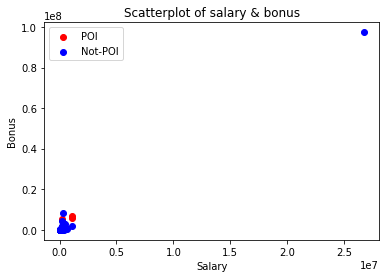

In [105]:
# Let's visualize the salaries and bonuses of ppl in enrone,that's a good way to find outliers

plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == True],enron_dataf["bonus"][enron_dataf["poi"] == True], color = 'r',
           label = "POI")
plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == False],enron_dataf["bonus"][enron_dataf["poi"] == False],color = 'b',
           label = "Not-POI")
    
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Scatterplot of salary & bonus")
plt.legend(loc='upper left')
plt.show() 

In [268]:
# As we can see there are some outliers that must be removed for further analysis.
# let's get rid off the total, which could cause a chaos. 
# After that we should remove all NANs and see the 6 top salaries as a list in Enron.


In [15]:
# Removing the NaN values:
#enron_dataf.replace(to_replace= 'NaN', value= 0,inplace=True)

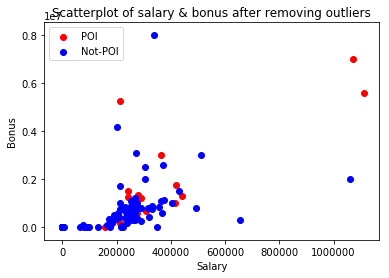

In [106]:
# Now let't eliminate the 'Total' counts!
# The plot brought a more comprehensive view

enron_dataf.drop('TOTAL', axis = 0, inplace = True)

plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == True],enron_dataf["bonus"][enron_dataf["poi"] == True], color = 'r',
           label = "POI")
plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == False],enron_dataf["bonus"][enron_dataf["poi"] == False],color = 'b',
           label = "Not-POI")
    
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Scatterplot of salary & bonus after removing outliers")
plt.legend(loc='upper left')
plt.show() 


In [19]:
#### FEATURES
#2. Feature processing of the dataset about ENRON

In [107]:
# Created two new features:
enron_dataf['new_feature_from_meassages_to_poi_ratio'] = enron_dataf['from_messages']/enron_dataf['from_poi_to_this_person']
enron_dataf['new_feature_to_messages_from_this_person_to_poi_ratio'] = enron_dataf['to_messages']/enron_dataf['from_this_person_to_poi']

In [108]:
features_list = ['poi', 'salary', 'bonus', 'expenses', 'deferred_income','total_payments',
                 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 
                 'from_messages', 'shared_receipt_with_poi', 'exercised_stock_options',
                'total_stock_value', 'new_feature_from_meassages_to_poi_ratio', 
                'new_feature_to_messages_from_this_person_to_poi_ratio']

In [109]:
#add our new features to the features list, to chyba juz nie ma sensu?
#features_list.append('new_feature_from_meassages_to_poi_ratio')
#features_list.append('new_feature_to_messages_from_this_person_to_poi_ratio')

In [110]:
# Removing the NaN values:
#enron_dataf.replace(to_replace= "NaN", value= 0,inplace=True)

In [111]:
#enron_dataf.drop('TOTAL', axis = 0, inplace = True)

In [112]:
enron_dataf = enron_dataf.replace('NaN', 0)

In [113]:
enron_dataf = enron_dataf.fillna(0)

In [114]:
enron_dataf.replace(to_replace = 'inf', value= 0, inplace=True)

In [115]:
enron_dataf = enron_dataf.astype(np.float64)

In [116]:
enron_dataf.dtypes

bonus                                                    float64
deferral_payments                                        float64
deferred_income                                          float64
director_fees                                            float64
email_address                                            float64
exercised_stock_options                                  float64
expenses                                                 float64
from_messages                                            float64
from_poi_to_this_person                                  float64
from_this_person_to_poi                                  float64
loan_advances                                            float64
long_term_incentive                                      float64
other                                                    float64
poi                                                      float64
restricted_stock                                         float64
restricted_stock_deferred

In [117]:
# Deleting the row with index 'THE TRAVEL AGENCY IN THE PARK'
enron_dataf.drop('THE TRAVEL AGENCY IN THE PARK', axis = 0, inplace = True) 

In [74]:
#enron_dataf.drop('email_address', axis = 1, inplace = True)

In [119]:
enron_dataf.head()

bonus  deferral_payments  deferred_income  \
METTS MARK         600000.0                0.0              0.0   
BAXTER JOHN C     1200000.0          1295738.0       -1386055.0   
ELLIOTT STEVEN     350000.0                0.0        -400729.0   
CORDES WILLIAM R        0.0                0.0              0.0   
HANNON KEVIN P    1500000.0                0.0       -3117011.0   

                  director_fees  email_address  exercised_stock_options  \
METTS MARK                  0.0            0.0                      0.0   
BAXTER JOHN C               0.0            0.0                6680544.0   
ELLIOTT STEVEN              0.0            0.0                4890344.0   
CORDES WILLIAM R            0.0            0.0                 651850.0   
HANNON KEVIN P              0.0            0.0                5538001.0   

                  expenses  from_messages  from_poi_to_this_person  \
METTS MARK         94299.0           29.0                     38.0   
BAXTER JOHN C      11200.0            0.0                      0.0   
ELLIOTT STEVEN     78552.0            0.0                      0.0   
CORDES WILLIAM R       0.0           12.0                     10.0   
HANNON KEVIN P     34039.0           32.0                     32.0   

                  from_this_person_to_poi  \
METTS MARK                            1.0   
BAXTER JOHN C                         0.0   
ELLIOTT STEVEN                        0.0   
CORDES WILLIAM R                      0.0   
HANNON KEVIN P                       21.0   

                                          ...                            poi  \
METTS MARK                                ...                            0.0   
BAXTER JOHN C                             ...                            0.0   
ELLIOTT STEVEN                            ...                            0.0   
CORDES WILLIAM R                          ...                            0.0   
HANNON KEVIN P                            ...                            1.0   

                  restricted_stock  restricted_stock_deferred    salary  \
METTS MARK                585062.0                        0.0  365788.0   
BAXTER JOHN C            3942714.0                        0.0  267102.0   
ELLIOTT STEVEN           1788391.0                        0.0  170941.0   
CORDES WILLIAM R          386335.0                        0.0       0.0   
HANNON KEVIN P            853064.0                        0.0  243293.0   

                  shared_receipt_with_poi  to_messages  total_payments  \
METTS MARK                          702.0        807.0       1061827.0   
BAXTER JOHN C                         0.0          0.0       5634343.0   
ELLIOTT STEVEN                        0.0          0.0        211725.0   
CORDES WILLIAM R                     58.0        764.0             0.0   
HANNON KEVIN P                     1035.0       1045.0        288682.0   

                  total_stock_value  new_feature_from_meassages_to_poi_ratio  \
METTS MARK                 585062.0                                 0.763158   
BAXTER JOHN C            10623258.0                                 0.000000   
ELLIOTT STEVEN            6678735.0                                 0.000000   
CORDES WILLIAM R          1038185.0                                 1.200000   
HANNON KEVIN P            6391065.0                                 1.000000   

                  new_feature_to_messages_from_this_person_to_poi_ratio  
METTS MARK                                               807.000000      
BAXTER JOHN C                                              0.000000      
ELLIOTT STEVEN                                             0.000000      
CORDES WILLIAM R                                                inf      
HANNON KEVIN P                                            49.761905      

[5 rows x 23 columns]

In [120]:

# Converting the above modified dataframe to a dictionary
enron_dict = enron_dataf.to_dict('index')

In [121]:
# To make it easier with further exploration let's set my dataset to a dataset
my_dataset = enron_dict

In [79]:
# enron_dict = pickle.load(open("final_project_dataset.pkl", "r") )

In [80]:
# Now let's focus on choosing the features to indentify a POI
# I will use only the provided features, POI, financial and email as per below:
# POI
# Features with email: 'from_messages', 'shared_receipt_with_poi',['fraction_mail_from_poi', 'fraction_mail_to_poi', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'from_messages']
# Financial features: ['poi', 'salary', 'bonus','deferral_payments', 'expenses', 
#                 'restricted_stock_deferred', 'restricted_stock', 'deferred_income','total_payments',
#                 'exercised_stock_options', 'total_stock_value', 'restricted_stock']


In [81]:
#data_dict = pickle.load(open("my_dataset.pkl", "r") )

In [122]:
data = featureFormat(my_dataset, features_list, sort_keys = True)

In [123]:
labels, features = targetFeatureSplit(data)

In [124]:
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.3, 
                                                                                             random_state=42)

In [125]:
### use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]


In [126]:
from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print 'accuracy before tuning ', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [127]:
importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
#print 'Feature Ranking: '
#for i in range(16):
#    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])


NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

In [128]:
### try Naive Bayes for prediction
#t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print accuracy

print "NB algorithm time:", round(time()-t0, 3), "s"


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [129]:
### use manual tuning parameter min_samples_split
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)
print 'precision = ', precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives
print 'recall = ', recall_score(labels_test,pred)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [130]:
numpy.isnan

NameError: name 'numpy' is not defined

In [131]:
np.where(np.isnan(features_train) | np.isinf(features_train))

(array([ 2, 10, 11, 17, 17, 27, 28, 45, 45, 46, 46, 52, 52, 61, 82, 85, 87,
        94, 94, 95, 95], dtype=int64),
 array([13, 13, 12, 12, 13, 13, 12, 12, 13, 12, 13, 12, 13, 13, 13, 13, 13,
        12, 13, 12, 13], dtype=int64))

In [132]:
### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

In [133]:
enron_dataf.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 23 columns):
bonus                                                    144 non-null float64
deferral_payments                                        144 non-null float64
deferred_income                                          144 non-null float64
director_fees                                            144 non-null float64
email_address                                            144 non-null float64
exercised_stock_options                                  144 non-null float64
expenses                                                 144 non-null float64
from_messages                                            144 non-null float64
from_poi_to_this_person                                  144 non-null float64
from_this_person_to_poi                                  144 non-null float64
loan_advances                                            144 non-null float64
long_term_incentive  

In [134]:
from sklearn.naive_bayes import GaussianNB

t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
accuracy = accuracy_score(labels_test, prediction)


print "Accuracy for GaussianNB:", accuracy
print "GaussianNB time of running algorithm:", round(time()-t0, 3), "s"

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [135]:
enron_dataf[enron_dataf.isin([np.inf, -np.inf, np.nan]).all(axis='columns')]

Empty DataFrame
Columns: [bonus, deferral_payments, deferred_income, director_fees, email_address, exercised_stock_options, expenses, from_messages, from_poi_to_this_person, from_this_person_to_poi, loan_advances, long_term_incentive, other, poi, restricted_stock, restricted_stock_deferred, salary, shared_receipt_with_poi, to_messages, total_payments, total_stock_value, new_feature_from_meassages_to_poi_ratio, new_feature_to_messages_from_this_person_to_poi_ratio]
Index: []

[0 rows x 23 columns]

In [136]:
# Another classifer is a Decision Tree,
# it gives certainly bigger accuracy


from sklearn.tree import DecisionTreeClassifier
# jak cos to to teraz dodalam wieczorem
from sklearn.metrics import accuracy_score

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'accuracy', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [137]:
from sklearn.neighbors import KNeighborsClassifier

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
print "testing time: ", round(time()-t0, 3), "s"
print "Accuracy of DT classifer is  : ",accuracy_score(labels_test, prediction)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [138]:
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
print "testing time: ", round(time()-t0, 3), "s"

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [139]:
##Accuracy can be interpreted as : 85.2% predictions on the total test set have been made correctly.

#Precision can be interpreted as : if a person is being classified as a POI by my classifier then there is a 47.6% chance that the person is actually a POI. (i.e., a 47.6% chance of obtaining a true positive condition.)

#Recall can be interpreted as : of all the actual POIs considered, 37.7% of all the POIs can be classified correctly as a POI by my classifier.



In [140]:
# Create final classifer/ 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_features=2, min_samples_split=2,
                             criterion='entropy', max_depth=None)

In [49]:
# With 146 Enron employers, 18 of which are POIs, the dataset used is both small and is imbalanced. zmien to jakos

In [141]:
# moze to potem do validacji?? chyba raczej trzeba uzyc tego pipeline czy cos
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], data[1]))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     
